## Wstęp

Netflix - to jedna z największych platform oferująca dostęp do filmów i seriali online. W Polsce wystartował jesienią 2016 roku. Użytkownicy mogą oglądać bez ograniczeń swoje ulubione programy na telefonie, tablecie, laptopie i telewizorze. Za korzystanie z usług jest pobierana miesięczna opłata.

## Wstępne przetwarzanie danych

#### Importowanie bibliotek

In [32]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


ModuleNotFoundError: No module named 'wordcloud'

#### Pobranie danych

In [ ]:
df = pd.read_csv('netflix_titles.csv', encoding='latin1')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

In [ ]:
df.describe()

,release_year,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,8809.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2014.181292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.818932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1925.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2024.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Określenie unikalnych wartości każdej kolumny

In [ ]:
unique_values_count = df.nunique()
unique_values_count_table = unique_values_count.reset_index()
unique_values_count_table.columns = ['Column', 'Unique Values Count']
print(unique_values_count_table)

          Column  Unique Values Count
0        show_id                 8809
1           type                    2
2          title                 8806
3       director                 4529
4           cast                 7694
5        country                  748
6     date_added                 1768
7   release_year                   75
8         rating                   18
9       duration                  220
10     listed_in                  516
11   description                 8777
12   Unnamed: 12                    0
13   Unnamed: 13                    0
14   Unnamed: 14                    0
15   Unnamed: 15                    0
16   Unnamed: 16                    0
17   Unnamed: 17                    0
18   Unnamed: 18                    0
19   Unnamed: 19                    0
20   Unnamed: 20                    0
21   Unnamed: 21                    0
22   Unnamed: 22                    0
23   Unnamed: 23                    0
24   Unnamed: 24                    0
25   Unnamed

#### Określenie pustych wartości 

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Unnamed: 12     8809
Unnamed: 13     8809
Unnamed: 14     8809
Unnamed: 15     8809
Unnamed: 16     8809
Unnamed: 17     8809
Unnamed: 18     8809
Unnamed: 19     8809
Unnamed: 20     8809
Unnamed: 21     8809
Unnamed: 22     8809
Unnamed: 23     8809
Unnamed: 24     8809
Unnamed: 25     8809
dtype: int64

In [ ]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.9%
cast null rate: 9.37%
country null rate: 9.43%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%
Unnamed: 12 null rate: 100.0%
Unnamed: 13 null rate: 100.0%
Unnamed: 14 null rate: 100.0%
Unnamed: 15 null rate: 100.0%
Unnamed: 16 null rate: 100.0%
Unnamed: 17 null rate: 100.0%
Unnamed: 18 null rate: 100.0%
Unnamed: 19 null rate: 100.0%
Unnamed: 20 null rate: 100.0%
Unnamed: 21 null rate: 100.0%
Unnamed: 22 null rate: 100.0%
Unnamed: 23 null rate: 100.0%
Unnamed: 24 null rate: 100.0%
Unnamed: 25 null rate: 100.0%


#### Porządkowanie brakujących wartości

In [ ]:
df = df[df.columns[:12]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [ ]:
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['date_added'].fillna(method='ffill', inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
df['duration'].fillna('Unknown', inplace=True)

df['release_year'] = pd.to_datetime(df['release_year'], format='%Y')
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='%B %d, %Y')

In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8809 non-null   object        
 1   type          8809 non-null   object        
 2   title         8809 non-null   object        
 3   director      8809 non-null   object        
 4   cast          8809 non-null   object        
 5   country       8809 non-null   object        
 6   date_added    8809 non-null   datetime64[ns]
 7   release_year  8809 non-null   datetime64[ns]
 8   rating        8809 non-null   object        
 9   duration      8809 non-null   object        
 10  listed_in     8809 non-null   object        
 11  description   8809 non-null   object        
dtypes: datetime64[ns](2), object(10)
memory usage: 826.0+ KB


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Wizualizacja

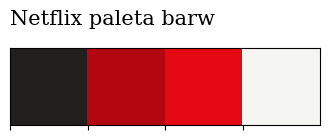

In [ ]:
# Ustalenie palety barw
import seaborn as sns
netflix_colors = sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])

plt.title("Netflix paleta barw",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

Podział na typy 

In [37]:
type_counts = df['type'].value_counts()
fig = px.pie(values=type_counts.values, names=type_counts.index, color_discrete_sequence=['#67000D', '#D21F20'],
            template='plotly_dark')

fig.update_layout(
    title={
        'text': "Distribution of Types",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 25
        }
    },
    legend={
        'orientation': 'h',
        'yanchor': 'bottom',
        'y': -0.1,
        'xanchor': 'center',
        'x': 0.5
    }
)

fig.show()

In [38]:
df_tvshow = df.loc[df['type'] == 'TV Show']
df_movie = df.loc[df['type'] == 'Movie']

In [40]:
country_count = df['country'].value_counts()
df_country = pd.DataFrame({'Country': country_count.index, 'Count': country_count.values})

fig = px.bar(df_country.head(10), x='Country', y='Count',
            labels = {'Country' : 'Country', 'Count' : 'Productions'},
            color='Count', color_continuous_scale='Reds',
            template='plotly_dark')

fig.update_layout(
    title={
        'text': "Top 10 Countries by Productions",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 25
        }
    }
)

fig.show()

In [42]:
seasons_values = df_tvshow['duration'].value_counts()
seasons = seasons_values.sort_values(ascending=True)

fig = px.bar(y=seasons.index, x=seasons.values,
            labels = {'x' : 'Number of seasons', 'y' : 'Count'},
            text=seasons.values,
            orientation='h',
            title='Count of shows by number of seasons',
            color=seasons, color_continuous_scale='Reds',
            template='plotly_dark')
fig.update_traces(textposition='outside')

fig.update_layout(
    title={
        'text': "Count of shows by number of seasons",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 25
        }
    }
)

fig.show()

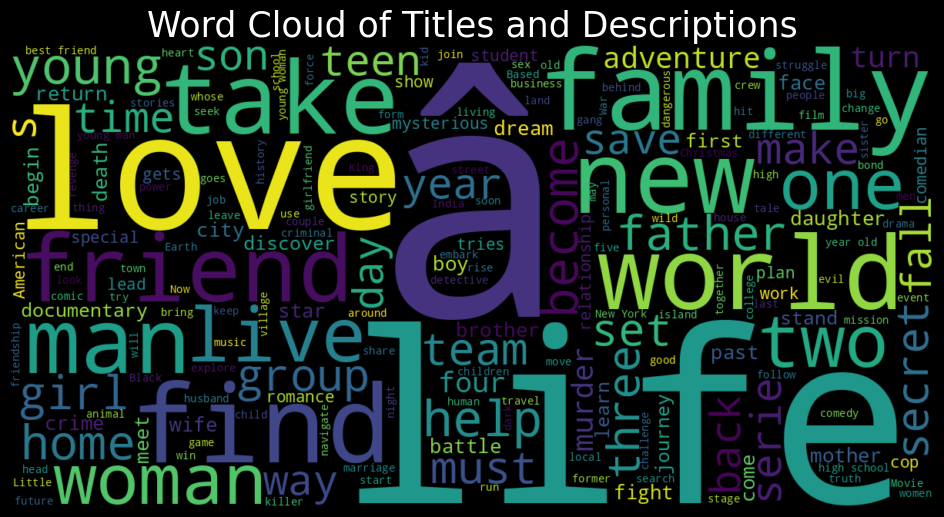

In [62]:
from wordcloud import WordCloud

text = ' '.join(df['title'] + ' ' + df['description'])

wordcloud = WordCloud(width=1200, height=600, background_color='black').generate(text)

plt.figure(figsize=(12, 6), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Titles and Descriptions', fontsize=25, loc='center', color='white')
plt.axis('off')
plt.show()

In [63]:
comedy_df = df[(df['listed_in'].str.contains('Comedies')) &  (df['release_year'].between('2000', '2021'))]
horror_df = df[(df['listed_in'].str.contains('Horror')) & (df['release_year'].between('2000', '2021'))]

In [72]:
comedy_count_by_year = comedy_df.groupby(comedy_df['release_year'].dt.year)['title'].count().reset_index()
comedy_count_by_year.columns = ['Year', 'Number of Comedies']

horror_count_by_year = horror_df.groupby(horror_df['release_year'].dt.year)['title'].count().reset_index()
horror_count_by_year.columns = ['Year', 'Number of Horror']

# Merge both DataFrames on 'Year' column
merged_df = pd.merge(comedy_count_by_year, horror_count_by_year, on='Year', how='outer').fillna(0)

fig = px.bar(merged_df, x='Year', y=['Number of Comedies', 'Number of Horror'],
             labels={'value': 'Number of Movies', 'variable': 'Genre'},
             color_discrete_map={'Number of Comedies': '#67000D', 'Number of Horror': 'red'},
             barmode='group',
             template='plotly_dark')

fig.update_layout(
    title={
        'text': "Number of Comedies vs. Horror genre Released Each Year",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 25
        }
    },
)


fig.show()

In [75]:
df_20002021 = df.copy()[df.copy()['release_year'].between('2000','2021')]

df_20002021['listed_in'] = df_20002021['listed_in'].str.split(', ')
df_20002021 = df_20002021.explode('listed_in')

genre_counts = df_20002021.groupby(['release_year', 'listed_in']).size().reset_index(name='count')

most_popular_genre_per_year = genre_counts.loc[genre_counts.groupby('release_year')['count'].idxmax()]

fig = px.bar(most_popular_genre_per_year, x='release_year', y='count', color='listed_in', 
             title='Most Popular Genre Each Year (2000-2021)', 
             labels={'release_year': 'Release Year', 'count': '', 'listed_in': 'Genre'},
             template='plotly_dark',
             color_continuous_scale='Reds')

fig.update_layout(
    title={
        'text': "Most Popular Genre Each Year (2000-2021)",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 25
        }
    }
)
fig.show()

In [76]:
international_movies_df = df[df['listed_in'].str.contains('International Movies')]

movies_released_per_year = international_movies_df.groupby('release_year').size().reset_index(name='count')

fig = px.line(movies_released_per_year, x='release_year', y='count', 
              title='Number of International Movies Released Each Year',
              labels={'release_year': 'Year', 'count': 'Number of Movies Released'},
              template='plotly_dark')
fig.update_traces(line_color='#D21F20', mode='lines', marker=None)
fig.update_layout(
    title={
        'text': "Number of International Movies Released Each Year",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 25
        }
    }
)
fig.show()

In [47]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
